In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [121]:
stroke_df.loc[5105]

id                          18234
gender                     Female
age                          80.0
hypertension                    1
heart_disease                   0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           83.75
bmi                           NaN
smoking_status       never smoked
stroke                          0
Name: 5105, dtype: object

In [122]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [123]:
stroke_df.drop(columns=['bmi'], inplace=True)

In [124]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {}
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column].astype(str))
            self.encoders[column] = le
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for column, encoder in self.encoders.items():
            X_copy[column] = encoder.transform(X_copy[column].astype(str))
        return X_copy

In [125]:
encoder = MultiColumnLabelEncoder()

In [126]:
stroke_encoded = encoder.fit_transform(stroke_df)

<Axes: >

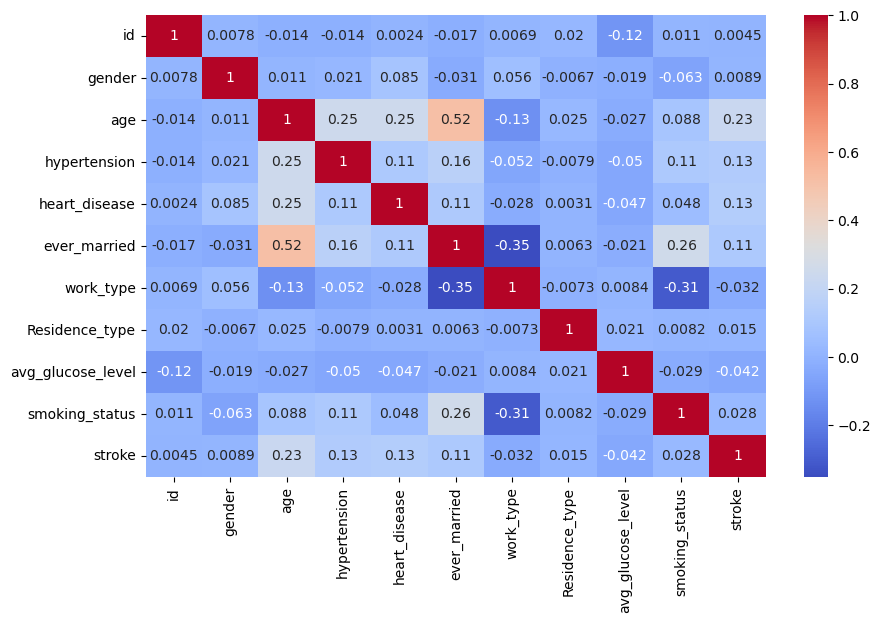

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_encoded.corr(),annot=True, cmap='coolwarm')

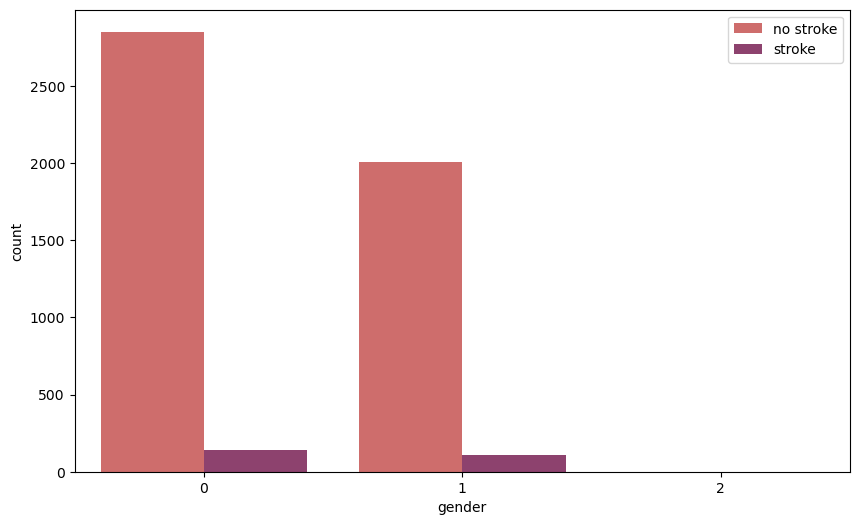

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=stroke_encoded, palette='flare',hue='stroke')
plt.legend(['no stroke','stroke'])

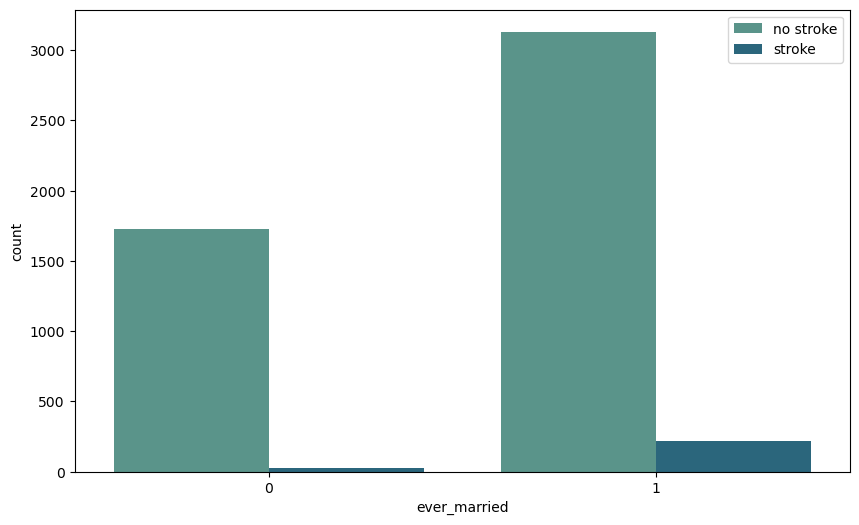

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=stroke_encoded, palette='crest',hue='stroke')
plt.legend(['no stroke','stroke'])

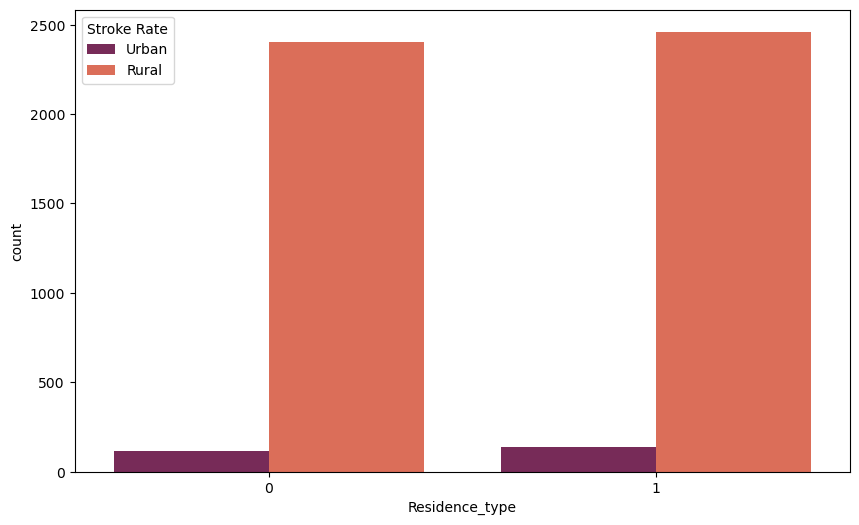

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stroke_encoded' is your DataFrame and it contains 'stroke' as a column with 0 and 1 values.

# Mapping the 'stroke' column to 'Urban' and 'Rural'.
stroke_encoded['stroke_label'] = stroke_encoded['stroke'].map({0: 'Rural', 1: 'Urban'})

plt.figure(figsize=(10,6))

sns.countplot(x="Residence_type", data=stroke_encoded, palette='rocket', hue='stroke_label')

# Since we've mapped the labels, the legend will automatically show 'Urban' and 'Rural'.
plt.legend(title='Stroke Rate')
plt.show()


In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_encoded.corr(),annot=True)

ValueError: could not convert string to float: 'Urban'

<Figure size 1000x600 with 0 Axes>

In [112]:
import pandas as pd

stroke_encoded.to_csv('/Users/raphael/Downloads/stroke_encoded.csv', index=False)


In [9]:
X = stroke_encoded.drop(columns=['id', 'stroke'])
y = stroke_encoded['stroke']

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.18236944, -0.16380436, -0.32984284, ..., -1.01260554,
         0.55673554,  0.58544081],
       [-0.84575934,  0.87264277, -0.32984284, ...,  0.98755138,
         1.11855479, -0.34582078],
       [ 1.18236944,  0.65671628,  3.03174692, ..., -1.01260554,
        -0.5634188 ,  0.58544081],
       ...,
       [-0.84575934, -0.72521321, -0.32984284, ..., -1.01260554,
         0.4792132 ,  0.58544081],
       [-0.84575934, -0.07743376, -0.32984284, ..., -1.01260554,
        -0.51551173,  1.5167024 ],
       [-0.84575934,  1.00219866, -0.32984284, ..., -1.01260554,
        -0.58083955, -1.27708237]])

In [12]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.84575934, -0.20698965, -0.32984284, ..., -1.01260554,
        -1.3882914 , -0.34582078],
       [-0.84575934,  1.47723692, -0.32984284, ...,  0.98755138,
         0.57938252, -0.34582078],
       [ 1.18236944, -0.8979544 , -0.32984284, ...,  0.98755138,
         0.32591058,  1.5167024 ],
       ...,
       [ 1.18236944, -0.81158381, -0.32984284, ...,  0.98755138,
         0.75794523, -1.27708237],
       [-0.84575934, -0.98432499, -0.32984284, ...,  0.98755138,
         1.1211679 ,  0.58544081],
       [-0.84575934, -2.15032801, -0.32984284, ...,  0.98755138,
         0.97831774, -1.27708237]])

In [13]:
# KNN Modeling + Plotting
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.909
k: 3, Train/Test Score: 0.962/0.928
k: 5, Train/Test Score: 0.958/0.936
k: 7, Train/Test Score: 0.956/0.940
k: 9, Train/Test Score: 0.955/0.941
k: 11, Train/Test Score: 0.955/0.941
k: 13, Train/Test Score: 0.955/0.941
k: 15, Train/Test Score: 0.955/0.941
k: 17, Train/Test Score: 0.955/0.941
k: 19, Train/Test Score: 0.955/0.941


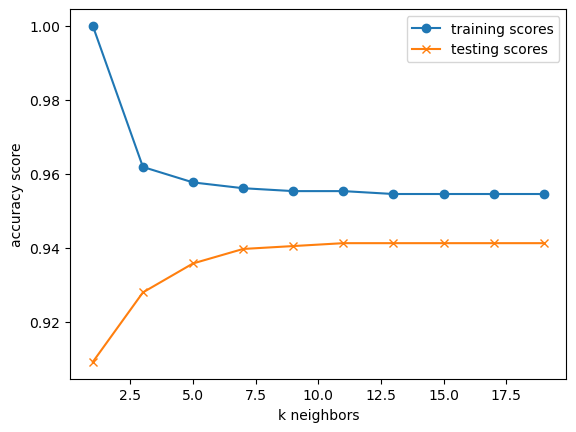

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [15]:
## Model and Fit to a Logistic Regression Classifier

In [16]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9545929018789144
Testing Data Score: 0.9420970266040689


In [18]:
## Model and Fit to a Support Vector Machine

In [19]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC()

In [20]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9551148225469729
Testing Data Score: 0.9413145539906104


In [21]:
## Model and Fit to a Decision Tree Classifier

In [22]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [23]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.905320813771518


In [24]:
## Model and Fit to a Random Forest Classifier

In [25]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [26]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9374021909233177
